In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
import statsmodels.api as sm
import statsmodels.tsa.api as smt
from statsmodels.tsa.stattools import adfuller
import matplotlib.pyplot as plt
from scipy.stats import boxcox
from scipy.special import inv_boxcox
%matplotlib inline

In [ ]:
def test_stationarity(timeseries):
    print('Results of Dickey-Fuller Test:')
    dftest = adfuller(timeseries, autolag='AIC')
    dfoutput = pd.Series(dftest[0:4], index=['Test Statistic', 'p-value', '#Lags Used', 'Number of Observations Used'])
    for [key, value] in dftest[4].items():
        dfoutput['Critical Value (%s)' % key] = value
    print(dfoutput)

In [2]:
# Function for plotting
def tsplot(y, lags=None, figsize=(14, 8), style='bmh'):
    test_stationarity(y)
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
    with plt.style.context(style):
        plt.figure(figsize=figsize)
        layout = (4, 1)
        ts_ax = plt.subplot2grid(layout, (0, 0), rowspan=2)
        acf_ax = plt.subplot2grid(layout, (2, 0))
        pacf_ax = plt.subplot2grid(layout, (3, 0))

        y.plot(ax=ts_ax, color='blue', label='Or')
        ts_ax.set_title('Original')

        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax, alpha=0.05)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax, alpha=0.05)

        plt.tight_layout()
    return

In [ ]:
series

Results of Dickey-Fuller Test:
Test Statistic                -1.792078e+01
p-value                        2.906694e-30
#Lags Used                     3.100000e+01
Number of Observations Used    4.960000e+03
Critical Value (1%)           -3.431669e+00
Critical Value (5%)           -2.862123e+00
Critical Value (10%)          -2.567080e+00
dtype: float64


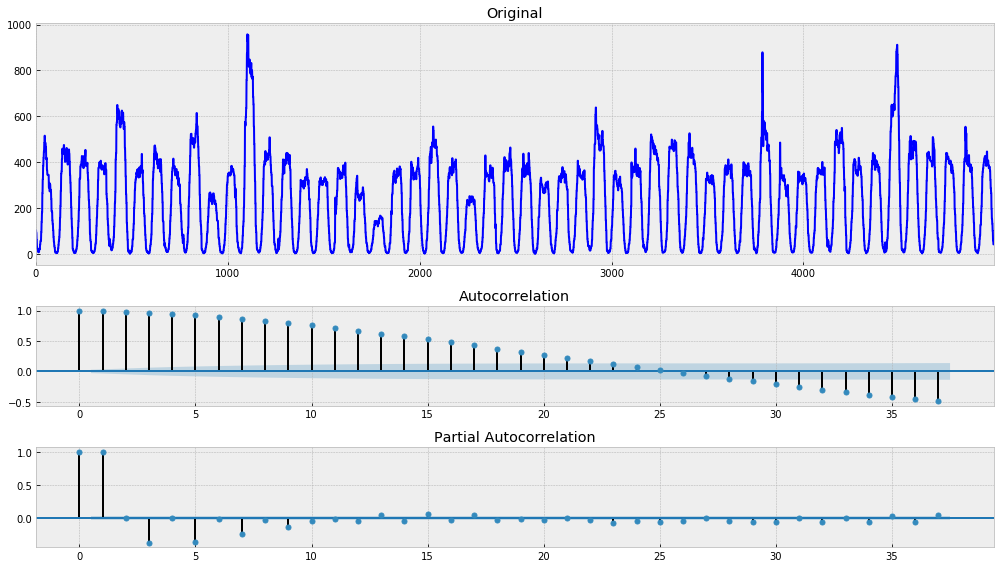

In [ ]:
series = pd.read_csv("mondays.csv")['Calls']
original_series = pd.read_csv("mondays.csv")['Calls']
tsplot(series)

Results of Dickey-Fuller Test:
Test Statistic                -1.321009e+01
p-value                        1.051362e-24
#Lags Used                     3.100000e+01
Number of Observations Used    4.959000e+03
Critical Value (1%)           -3.431669e+00
Critical Value (5%)           -2.862123e+00
Critical Value (10%)          -2.567080e+00
dtype: float64


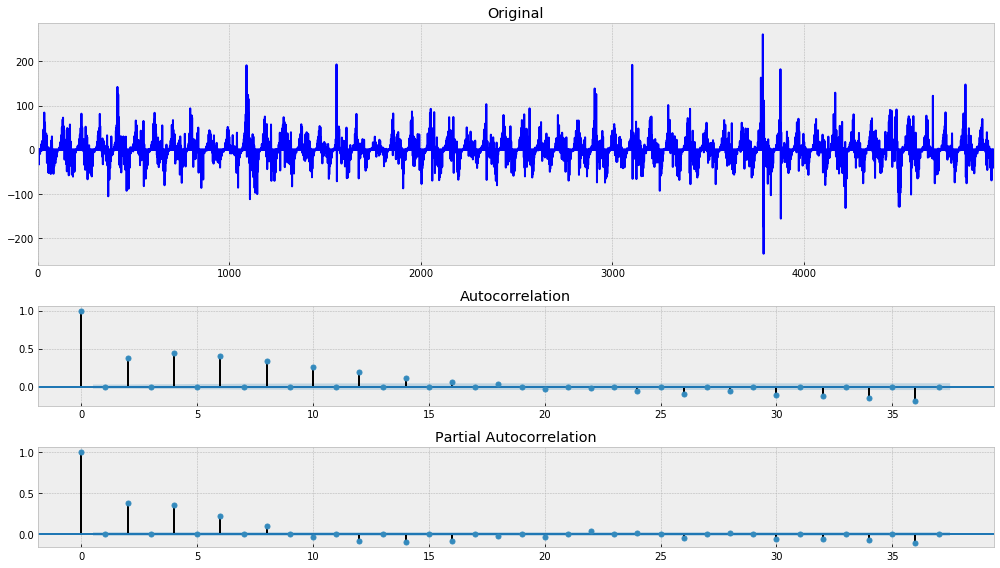

In [ ]:
#Removing trend using differentiation
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

series = difference(series) #убрать тренд, сохраняем этап
trend_save = series
tsplot(series)

In [ ]:
print((series))

[0.0, -12.0, 0.0, -31.0, 0.0, -33.5, 0.0, -4.0, 0.0, -3.0, 0.0, -9.5, 0.0, -3.0, 0.0, 3.5, 0.0, 12.0, 0.0, -2.5, 0.0, 19.5, 0.0, 15.5, 0.0, 3.5, 0.0, 35.5, 0.0, 46.0, 0.0, 40.0, 0.0, 84.0, 0.0, 62.0, 0.0, 56.5, 0.0, 36.5, 0.0, 27.5, 0.0, 36.5, 0.0, 32.0, 0.0, -30.0, 0.0, -3.0, 0.0, -18.0, 0.0, -51.5, 0.0, 5.5, 0.0, -52.5, 0.0, -19.0, 0.0, -3.0, 0.0, 0.5, 0.0, 0.0, 0.0, -55.0, 0.0, 20.5, 0.0, -37.0, 0.0, 30.0, 0.0, -22.5, 0.0, -2.5, 0.0, -37.0, 0.0, -54.5, 0.0, -2.5, 0.0, -37.5, 0.0, -17.5, 0.0, -24.5, 0.0, -30.5, 0.0, -21.0, 0.0, -17.0, 0.0, -9.0, 0.0, -15.5, 0.0, -6.0, 0.0, -0.5, 0.0, 0.5, 0.0, -1.0, 0.0, -1.0, 0.0, 4.5, 0.0, 5.0, 0.0, 10.5, 0.0, 17.0, 0.0, 17.0, 0.0, 15.5, 0.0, 33.5, 0.0, 50.5, 0.0, 51.5, 0.0, 68.5, 0.0, 72.5, 0.0, 11.5, 0.0, 53.0, 0.0, 45.0, 0.0, -22.5, 0.0, 1.0, 0.0, 15.0, 0.0, 22.5, 0.0, -32.5, 0.0, 8.0, 0.0, -49.0, 0.0, 49.0, 0.0, -28.5, 0.0, -6.0, 0.0, 46.0, 0.0, -58.0, 0.0, 23.5, 0.0, -37.5, 0.0, 57.0, 0.0, -10.0, 0.0, 18.5, 0.0, -19.5, 0.0, -34.5, 0.0, -56.5, 

In [ ]:
series = pd.Series.append(first_one, series)

In [ ]:
first_one = pd.Series(original_series.loc[0])


In [ ]:
series = pd.DataFrame(series)

In [ ]:
series

,0
0,103.5
0,0.0
1,-12.0
2,0.0
3,-31.0
...,...
4986,0.0
4987,-41.0
4988,0.0
4989,-17.5


In [ ]:
first_one

0    35.0
dtype: float64

In [ ]:
original_series = pd.read_csv("mondays (1).csv")['Calls']


In [ ]:
original_series

0       103.5
1       103.5
2        91.5
3        91.5
4        60.5
        ...  
4987    100.5
4988     59.5
4989     59.5
4990     42.0
4991     42.0
Name: Calls, Length: 4992, dtype: float64

In [ ]:
def inverse_difference(last_ob, value):
	return value + last_ob
  
inverted = [inverse_difference(data[i], diff[i]) for i in range(len(diff))]

In [ ]:
type(series)

pandas.core.frame.DataFrame

In [ ]:
mondays = pd.read_csv('mondays.csv')
type(mondays)

pandas.core.frame.DataFrame

In [ ]:
mondays['Calls'] = series.values

In [ ]:
mondays

,Unnamed: 0,Date,Interval,Calls,Day of week (int),Day of week (str)
0,288,2016-01-04,00:00 - 00:15,103.5,0,Monday
1,289,2016-01-04,00:15 - 00:30,0.0,0,Monday
2,290,2016-01-04,00:30 - 00:45,-12.0,0,Monday
3,291,2016-01-04,00:45 - 01:00,0.0,0,Monday
4,292,2016-01-04,01:00 - 01:15,-31.0,0,Monday
...,...,...,...,...,...,...
4987,34651,2016-12-26,22:45 - 23:00,0.0,0,Monday
4988,34652,2016-12-26,23:00 - 23:15,-41.0,0,Monday
4989,34653,2016-12-26,23:15 - 23:30,0.0,0,Monday
4990,34654,2016-12-26,23:30 - 23:45,-17.5,0,Monday


In [ ]:
mondays.to_csv('mondays_to_predict.csv')
mondays.to_excel('mondays_to_predict.xlsx')